# CDC_Capstone:  Part I - Data


Purpose: This is a mutli-class classification problem used to determine the probability of diabetes based select features

# Explore the Data



Use this space to familiarize myself with the data set.



Do some quick EDA
Check data types
Check amount of data  
Look at summary statistics
Review the column names

In [6]:
#pip install import-ipynb

In [1]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Statistics imports
from scipy import stats
import statsmodels.api as sm

import csv
import import_ipynb
import pandas as pd


In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/static/public/891/data.csv"
df = pd.read_csv(url)

print(df.head(1))  # Print the first few rows

   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        5        18        15         1    0    9          4       3  

[1 rows x 23 columns]


In [3]:
df.columns


Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

Imports


In [4]:
#display number of rows and columns
df.shape 


(253680, 23)

In [5]:
#display info
df.describe

<bound method NDFrame.describe of             ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0            0                0       1         1          1   40       1   
1            1                0       0         0          0   25       1   
2            2                0       1         1          1   28       0   
3            3                0       1         0          1   27       0   
4            4                0       1         1          1   24       0   
...        ...              ...     ...       ...        ...  ...     ...   
253675  253675                0       1         1          1   45       0   
253676  253676                1       1         1          1   18       0   
253677  253677                0       0         0          1   28       0   
253678  253678                0       1         0          1   23       0   
253679  253679                1       1         1          1   25       0   

        Stroke  HeartDiseaseorAttack  Phy

In [6]:
df.dtypes

ID                      int64
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [7]:
#discovering more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

In [8]:
#identify missing values -- the data has no missing values
df.isna().sum()

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
f = lambda x:x==1

In [10]:
#various ways to view the data
#what is the education level of smokers
df['Smoker_1'] = df['Smoker'].apply(f)

In [15]:
df['Smoker_1'].describe()

count     253680
unique         2
top        False
freq      141257
Name: Smoker_1, dtype: object

In [16]:
#counter where value is True
is_Smoker = df['Smoker'] == 1

In [17]:
#Obervation
#data includes 141K non-smokers do not have diabetes and 112K smokers do have diabetes

df.groupby(['Smoker', 'Diabetes_binary']).agg(['count' ]).reset_index()

,Smoker,Diabetes_binary,ID,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Smoker_1
,,,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
0,0,0,124228,124228,124228,124228,124228,124228,124228,124228,...,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228
1,0,1,17029,17029,17029,17029,17029,17029,17029,17029,...,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029
2,1,0,94106,94106,94106,94106,94106,94106,94106,94106,...,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106
3,1,1,18317,18317,18317,18317,18317,18317,18317,18317,...,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317


Smokers have a decreased risk of developing diabetes than a non-smoker 

In [18]:

#

df.groupby(by=['Diabetes_binary'])['Smoker'].agg(['count' ]).reset_index()

,Diabetes_binary,count
0,0,218334
1,1,35346


There are more non-somkers with diabetes than smokers.  I wonder why?

In [19]:
#PhysHlth  DiffWalk  Sex  Age  Education  Income  
#1 Never attended school or only kindergarten  
#2 Grades 1 through 8 (Elementary)   
#3 Grades 9 through 11 (Some high school)   
#4 Grade 12 or GED (High school graduate)   
#5 College 1 year to 3 years (Some college or technical school)   
#6 College 4 years or more (College graduate)   
#9 Refused   
#BLANK Not asked or Missing 1,770

df['Education'].value_counts()

6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: Education, dtype: int64

In [20]:
#what are the education levels of people with diabetes?
#Obervation
#data includes 141K non-smokers do not have diabetes and 112K smokers do have diabetes

df.groupby(['Education', 'Diabetes_binary']).agg(['count' ]).reset_index()

,Education,Diabetes_binary,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income,Smoker_1
,,,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
0,1,0,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
1,1,1,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
2,2,0,2860,2860,2860,2860,2860,2860,2860,2860,...,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860
3,2,1,1183,1183,1183,1183,1183,1183,1183,1183,...,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183
4,3,0,7182,7182,7182,7182,7182,7182,7182,7182,...,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182
5,3,1,2296,2296,2296,2296,2296,2296,2296,2296,...,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296
6,4,0,51684,51684,51684,51684,51684,51684,51684,51684,...,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684
7,4,1,11066,11066,11066,11066,11066,11066,11066,11066,...,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066
8,5,0,59556,59556,59556,59556,59556,59556,59556,59556,...,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556


As the education level increase, so does diabetes count

In [21]:
#create a subset of data
physical_df = df[['Diabetes_binary', 'PhysActivity','Fruits','Veggies' ]]
             

In [22]:
fruits_df = df[['Diabetes_binary', 'Fruits','Veggies']]  
             

In [23]:
heartdis_df = df[['Diabetes_binary','HeartDiseaseorAttack' ,'PhysActivity' ]]

In [24]:
physical_df.groupby(['PhysActivity', 'Diabetes_binary']).agg(['count' ]).reset_index()

 

,PhysActivity,Diabetes_binary,Fruits,Veggies
,,,count,count
0,0,0,48701,48701
1,0,1,13059,13059
2,1,0,169633,169633
3,1,1,22287,22287


individual that eat fruits and veggies with physical activity had less diabetes

In [25]:
heartdis_df.groupby(['HeartDiseaseorAttack', 'Diabetes_binary']).agg(['count' ]).reset_index()

,HeartDiseaseorAttack,Diabetes_binary,PhysActivity
,,,count
0,0,0,202319
1,0,1,27468
2,1,0,16015
3,1,1,7878


Individuals that stay active are less likely to have heart attack or diabetes

### summary statistics

In [26]:
 
def summary_statistics(column, data):
    X = data[column]
    print ('COLUMN: ' + column)
    print ('mean: ' + str(np.mean(X)))
    print ('median: ' + str(np.median(X)))
    print ('mode: ' + str(stats.mode([round(d) for d in X])))
    print ('variance: ' + str(np.var(X)))
    print ('standard deviation: ' + str(np.std(X)))

In [27]:
#Identify a normal distribution within a data set using summary statistics and data visualizations
summary_statistics('Age', df)

COLUMN: Age
mean: 8.032119205298013
median: 8.0
mode: ModeResult(mode=array([9]), count=array([33244]))
variance: 9.328225688720385
standard deviation: 3.05421441433315


Average age is 8 

### Education levels



#1 Never attended school or only kindergarten  
#2 Grades 1 through 8 (Elementary)   
#3 Grades 9 through 11 (Some high school)   
#4 Grade 12 or GED (High school graduate)   
#5 College 1 year to 3 years (Some college or technical school)   
#6 College 4 years or more (College graduate)   
#9 Refused   
#BLANK Not asked or Missing 1,770

In [28]:
#Identify a normal distribution within a data set using summary statistics and data visualizations
summary_statistics('Education', df)



COLUMN: Education
mean: 5.050433617155472
median: 5.0
mode: ModeResult(mode=array([6]), count=array([107325]))
variance: 0.9717468949159729
standard deviation: 0.9857722327779237


Average education is College 1 year to 3 years

In [29]:
df[['Diabetes_binary', 'Education','Age','PhysActivity','Fruits','Veggies' ]].describe()

,Diabetes_binary,Education,Age,PhysActivity,Fruits,Veggies
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,5.050434,8.032119,0.756544,0.634256,0.811420
std,0.346294,0.985774,3.054220,0.429169,0.481639,0.391175
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000
50%,0.000000,5.000000,8.000000,1.000000,1.000000,1.000000
75%,0.000000,6.000000,10.000000,1.000000,1.000000,1.000000
max,1.000000,6.000000,13.000000,1.000000,1.000000,1.000000


Data may not be accurate.  Show the average person has 
college 1-3 years experience

# Correlation 

## Identify most prominent features

<AxesSubplot:>

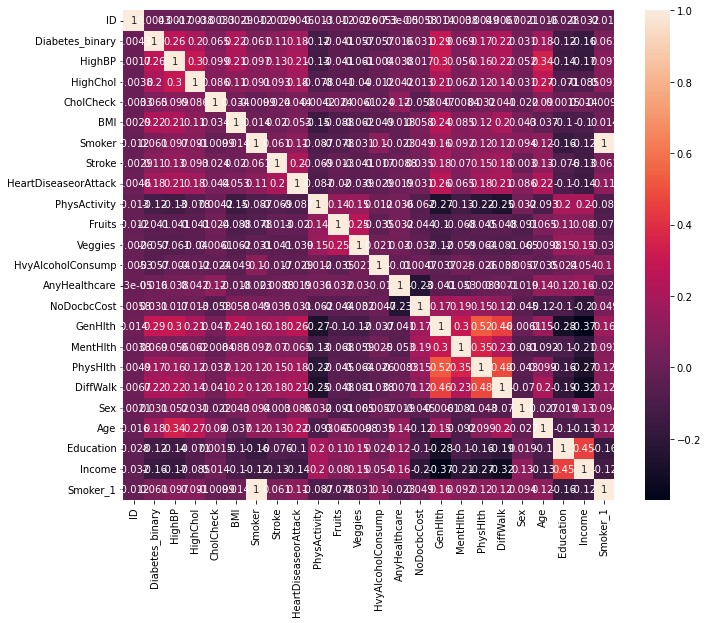

In [30]:

corr = df.corr()
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)
#sns.heatmap(corr)

identified heat around diffwalk, physical health, general health income and eduction.

<AxesSubplot:>

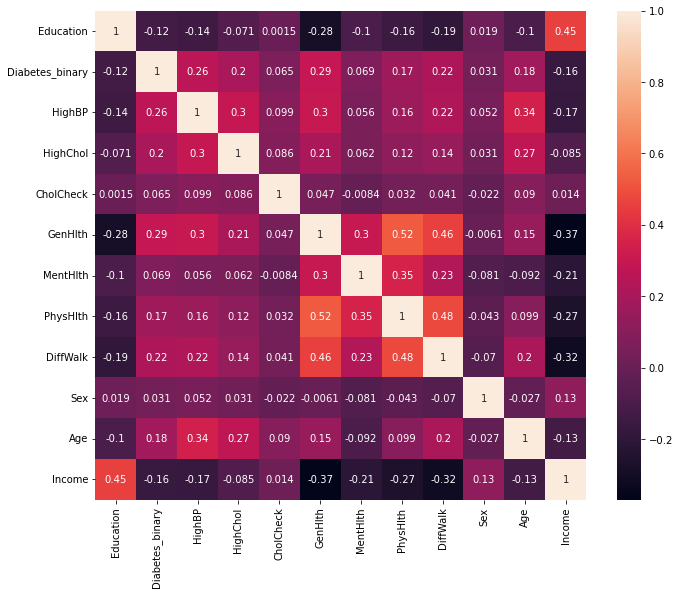

In [31]:
#Take a closer look
corr = df[['Education','Diabetes_binary','HighBP','HighChol','CholCheck','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']].corr()
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)
#sns.heatmap(corr)

Top 5 correlated features are centered around mental and phyical health.  I plan to use this features when I build my prediction model
 

Convince yourself that there are no issues with the data. If you find any, clean them now.

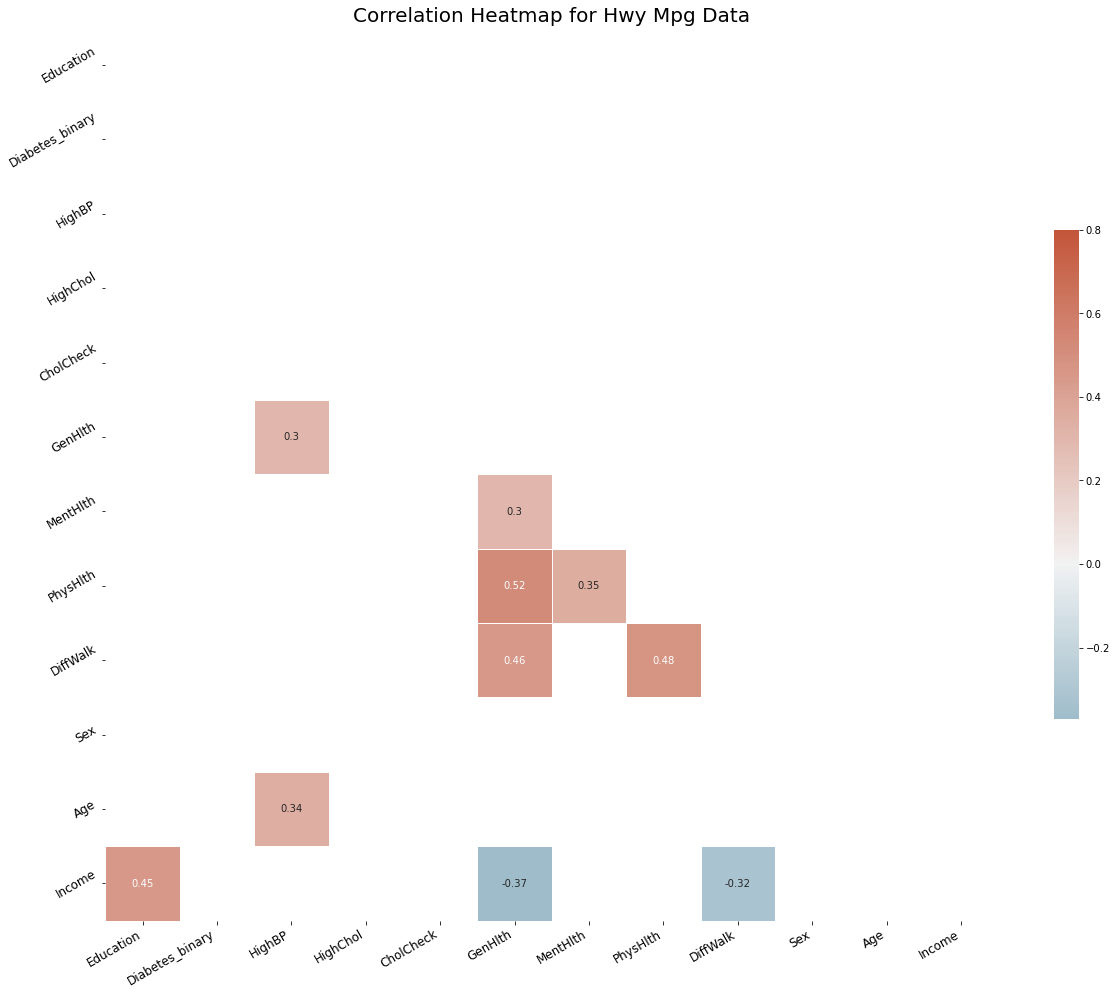

In [34]:

#only show correlations where the values are greater than .3

#Let's create a heatmap only with significant corrrelations that is a bit easier to read.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask = mask|((np.abs(corr)<0.3).values)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

hm.set_title('Correlation Heatmap for Hwy Mpg Data', fontsize=20)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=30, ha='right')

plt.show();